<a href="https://colab.research.google.com/github/lantisseverus/EU_Soccer_League_SQL/blob/main/European_Soccer_League_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Import & Environment Configuration

This dataset contains 7 tables, including Country, League, Match, Player, Player_Attributes, Team, Team Attributes. By understaning each table and data cleaning, we will know what can be executed in the following data analysis with SQL.

Data comes from this Kaggle: https://www.kaggle.com/code/dimarudov/data-analysis-using-sql/input

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('/content/EU_Soccer_League.sqlite') #your real path
cursor = conn.cursor()

tables = pd.read_sql("""SELECT *
FROM sqlite_master
WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


## Load each table

* Country
* Player
* Match
* League
* Team
* Team_Attribute
* Player_Attribute

In [3]:
country = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [4]:
player = pd.read_sql("""SELECT *
                        FROM Player;""", conn)
player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [5]:
game = pd.read_sql("""SELECT *
                        FROM Match;""", conn)
game

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
league = pd.read_sql("""SELECT *
                        FROM League;""", conn)
league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [7]:
team = pd.read_sql("""SELECT *
                        FROM Team;""", conn)
team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [8]:
team_attribute = pd.read_sql("""SELECT *
                        FROM Team_Attributes;""", conn)
team_attribute

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


In [9]:
player_attribute =  pd.read_sql("""SELECT *
                        FROM Player_Attributes;""", conn)
player_attribute

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


## Table Join

* JOIN League and Country tables
* JOIN Player and Subset of Player_Attributes
* JOIN Team and Subset of Team_Attributes tables

*NOTE: Cannot create temporary table while using pandas `read_sql`*

In [10]:
league_country = pd.read_sql("""SELECT l.name AS league, c.name AS country
                             FROM League AS l
                             LEFT JOIN Country AS c
                             ON l.country_id = c.id;""", conn)
league_country

,league,country
0,Belgium Jupiler League,Belgium
1,England Premier League,England
2,France Ligue 1,France
3,Germany 1. Bundesliga,Germany
4,Italy Serie A,Italy
5,Netherlands Eredivisie,Netherlands
6,Poland Ekstraklasa,Poland
7,Portugal Liga ZON Sagres,Portugal
8,Scotland Premier League,Scotland
9,Spain LIGA BBVA,Spain


In [20]:
player_attribute_agg = pd.read_sql("""SELECT p.player_api_id, p.player_name, p.height, p.weight, p.birthday,
                                   AVG(pa.overall_rating) AS avg_rating, AVG(pa.penalties) AS avg_penalties
                                   FROM Player AS p
                                   LEFT JOIN Player_Attributes AS pa
                                   USING (player_api_id)
                                   GROUP BY p.player_api_id;
                                   """, conn)
player_attribute_agg

,player_api_id,player_name,height,weight,birthday,avg_rating,avg_penalties
0,2625,"Patryk Rachwal,18",175.26,154,1981-01-27 00:00:00,60.142857,61.928571
1,2752,Diego Mainz,187.96,174,1982-12-29 00:00:00,69.380952,35.428571
2,2768,Jose Dorado,180.34,154,1982-07-10 00:00:00,69.285714,31.904762
3,2770,Ignacio Gonzalez,180.34,161,1982-05-14 00:00:00,71.133333,63.933333
4,2790,Alberto Rey,175.26,163,1974-02-15 00:00:00,70.200000,55.400000
...,...,...,...,...,...,...,...
11055,744907,Greg Taylor,172.72,137,1997-11-05 00:00:00,51.909091,52.454545
11056,746419,Francisco Afonso,175.26,152,1997-04-24 00:00:00,59.000000,43.000000
11057,748432,Fynn Arkenberg,187.96,176,1996-03-04 00:00:00,58.000000,45.000000
11058,750435,Rees Greenwood,172.72,150,1996-01-20 00:00:00,56.444444,61.000000


In [12]:
team_attribute_agg = pd.read_sql("""SELECT t1.team_api_id, t1.team_long_name,
                                    AVG(buildUpPlaySpeed) AS avg_speed,
                                    AVG(buildUpPlayDribbling) AS avg_dribbling,
                                    AVG(buildUpPlayPassing) AS avg_build_pass,
                                    AVG(chanceCreationShooting) AS avg_chance_shoot,
                                    AVG(chanceCreationPassing) AS avg_chance_pass,
                                    AVG(chanceCreationCrossing) AS avg_chance_cross,
                                    AVG(defencePressure) AS avg_defense_pressure,
                                    AVG(defenceAggression) AS avg_defense_aggression,
                                    AVG(defenceTeamWidth) AS avg_defense_team_width
                                 FROM Team AS t1
                                 LEFT JOIN Team_Attributes AS t2
                                 ON t1.team_api_id = t2.team_api_id
                                 GROUP BY t1.team_api_id ;
                                 """, conn)

team_attribute_agg

,team_api_id,team_long_name,avg_speed,avg_dribbling,avg_build_pass,avg_chance_shoot,avg_chance_pass,avg_chance_cross,avg_defense_pressure,avg_defense_aggression,avg_defense_team_width
0,1601,Ruch Chorzów,47.333333,48.0,46.166667,53.5,55.500000,60.333333,47.166667,47.333333,49.333333
1,1773,Oud-Heverlee Leuven,52.000000,51.0,50.000000,54.0,50.000000,53.000000,43.000000,44.000000,50.000000
2,1957,Jagiellonia Białystok,47.166667,54.0,52.666667,67.0,50.833333,36.333333,49.333333,56.333333,53.666667
3,2033,S.C. Olhanense,49.000000,62.0,48.400000,48.2,51.800000,44.200000,42.200000,33.800000,45.400000
4,2182,Lech Poznań,60.333333,52.5,49.000000,68.0,56.666667,57.333333,51.666667,48.500000,54.500000
...,...,...,...,...,...,...,...,...,...,...,...
294,158085,FC Arouca,67.000000,66.0,39.000000,46.0,55.000000,59.000000,36.000000,38.000000,37.000000
295,177361,Termalica Bruk-Bet Nieciecza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,188163,Tondela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,208931,Carpi,56.000000,45.5,48.000000,52.0,58.500000,38.000000,35.500000,49.500000,43.000000


## Exploratory Data Analysis

* Which country and league scores the most over the years?
* Is the player's age and height relevant to their performance?
* Does the Team's shooting chance create more goals for the team?
* Does the Team's defense width lead to fewer goals for their rival team?


In [47]:
team_game_league = pd.read_sql("""SELECT t.team_long_name AS Team, l.name AS League,
                        (m.home_team_goal + m.away_team_goal) AS total_goal
                        FROM Match AS m
                        LEFT JOIN Team AS t
                        ON t.team_api_id = m.home_team_api_id OR t.team_api_id = m.away_team_api_id
                        LEFT JOIN League AS l
                        ON m.league_id = l.id
                        GROUP BY  t.team_api_id
                        ORDER BY goal DESC;
                        """, conn)
team_game_league

,Team,League,total_goal
0,Carpi,Italy Serie A,7
1,Reggio Calabria,Italy Serie A,3
2,Chievo Verona,Italy Serie A,3
3,Bari,Italy Serie A,2
4,Crystal Palace,England Premier League,1
...,...,...,...
294,Lech Poznań,Poland Ekstraklasa,5
295,S.C. Olhanense,Portugal Liga ZON Sagres,0
296,Jagiellonia Białystok,Poland Ekstraklasa,2
297,Oud-Heverlee Leuven,Belgium Jupiler League,3


From the above table we can know that Stade Rennais FC and Olympique de Marseille from Frace Ligue 1 (France) scores the most over years.

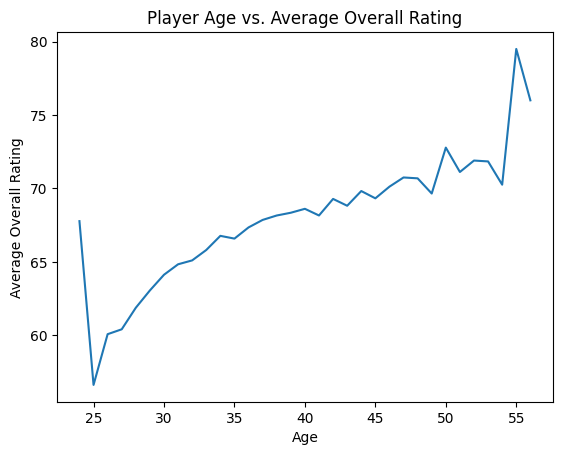

In [38]:
import datetime as dt
player_attribute_agg["birthday"] = pd.to_datetime(player_attribute_agg["birthday"])
player_attribute_agg["Age"] = (2023 - player_attribute_agg["birthday"].dt.year)
player_attribute_agg
sns.lineplot(data= player_attribute_agg, x="Age", y="avg_rating", errorbar= None)
plt.title("Player Age vs. Average Overall Rating")
plt.ylabel("Average Overall Rating")
plt.show()

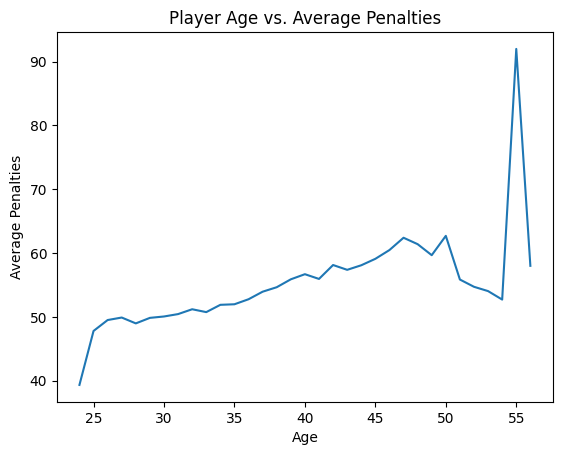

In [39]:
sns.lineplot(data= player_attribute_agg, x="Age", y="avg_penalties", errorbar= None)
plt.title("Player Age vs. Average Penalties")
plt.ylabel("Average Penalties")
plt.show()

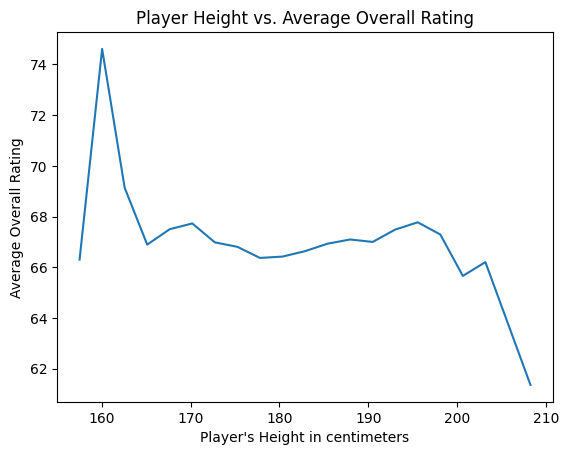

In [41]:
sns.lineplot(data= player_attribute_agg, x="height", y="avg_rating", errorbar= None)
plt.title("Player Height vs. Average Overall Rating")
plt.xlabel("Player's Height in centimeters")
plt.ylabel("Average Overall Rating")
plt.show()

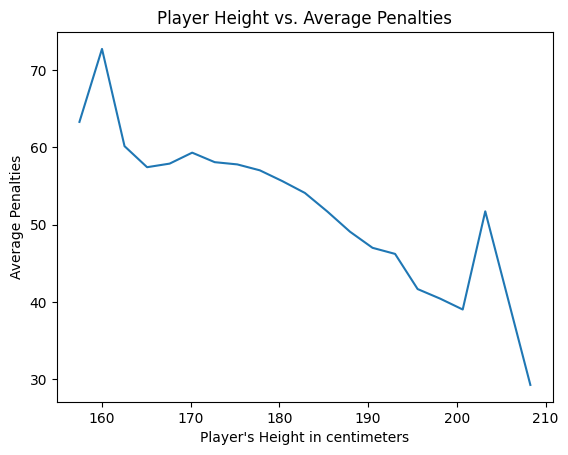

In [42]:
sns.lineplot(data= player_attribute_agg, x="height", y="avg_penalties", errorbar= None)
plt.title("Player Height vs. Average Penalties")
plt.xlabel("Player's Height in centimeters")
plt.ylabel("Average Penalties")
plt.show()

From the above line plot, we can tell that the older a player becomes, the more likely the player's overall rating will increase and so will penalties. This may imply that overall rating and penalty performance have something to do with experience.

Interestingly, the player's height suggests a negative relevance between the player's overall rating and penalty performance. The shorter players (compared to basketball players in general) usually have better performance than taller players in these 2 indexes.

In [53]:
q3 = pd.read_sql("""SELECT t1.team_long_name,
                                    SUM(m.home_team_goal) AS home_goal,
                                    AVG(buildUpPlaySpeed) AS avg_speed,
                                    AVG(chanceCreationShooting) AS avg_chance_shoot
                                 FROM Team AS t1
                                 LEFT JOIN Team_Attributes AS t2
                                 ON t1.team_api_id = t2.team_api_id
                                 LEFT JOIN Match AS m
                                 ON t2.team_api_id = m.home_team_api_id OR t2.team_api_id = m.away_team_api_id
                                 GROUP BY t1.team_api_id;
                                 """, conn)
q3.head()

,team_long_name,home_goal,avg_speed,avg_chance_shoot
0,Ruch Chorzów,1902.0,47.333333,53.5
1,Oud-Heverlee Leuven,489.0,52.000000,54.0
2,Jagiellonia Białystok,2208.0,47.166667,67.0
3,S.C. Olhanense,935.0,49.000000,48.2
4,Lech Poznań,2004.0,60.333333,68.0
...,...,...,...,...
294,FC Arouca,248.0,67.000000,46.0
295,Termalica Bruk-Bet Nieciecza,NaN,NaN,NaN
296,Tondela,NaN,NaN,NaN
297,Carpi,108.0,56.000000,52.0


### Data Cleaning - replace Missing Value (NaN) with 0

In [63]:
q3['home_goal']=q3['home_goal'].replace(np.nan, 0)
q3['avg_speed']=q3['avg_speed'].replace(np.nan, 0)
q3['avg_chance_shoot']=q3['avg_chance_shoot'].replace(np.nan, 0)
q3.head()

,team_long_name,home_goal,avg_speed,avg_chance_shoot,home_goal\t
0,Ruch Chorzów,1902.0,47.333333,53.5,1902.0
1,Oud-Heverlee Leuven,489.0,52.000000,54.0,489.0
2,Jagiellonia Białystok,2208.0,47.166667,67.0,2208.0
3,S.C. Olhanense,935.0,49.000000,48.2,935.0
4,Lech Poznań,2004.0,60.333333,68.0,2004.0


In [64]:
np.corrcoef(q3["home_goal"], q3["avg_speed"])[0, 1]

0.2726935634429327

Home goal has mild association with the team average speed.

In [65]:
np.corrcoef(q3["home_goal"], q3["avg_chance_shoot"])[0, 1]

0.2786700189227392

Home goal has mild association with the team average chance of shoot.

In [70]:
q4 = pd.read_sql("""SELECT t1.team_long_name,
                                    m.home_team_goal+ m.away_team_goal AS total_goal,
                                    AVG(defencePressure) AS avg_defense_pressure,
                                    AVG(defenceAggression) AS avg_defense_aggression,
                                    AVG(defenceTeamWidth) AS avg_defense_team_width
                                 FROM Team AS t1
                                 LEFT JOIN Team_Attributes AS t2
                                 ON t1.team_api_id = t2.team_api_id
                                 LEFT JOIN Match AS m
                                 ON t2.team_api_id = m.home_team_api_id OR t2.team_api_id = m.away_team_api_id
                                 GROUP BY t1.team_api_id;
                                 """, conn)
q4.head()

,team_long_name,total_goal,avg_defense_pressure,avg_defense_aggression,avg_defense_team_width
0,Ruch Chorzów,0.0,47.166667,47.333333,49.333333
1,Oud-Heverlee Leuven,3.0,43.000000,44.000000,50.000000
2,Jagiellonia Białystok,2.0,49.333333,56.333333,53.666667
3,S.C. Olhanense,0.0,42.200000,33.800000,45.400000
4,Lech Poznań,5.0,51.666667,48.500000,54.500000


### Data Cleaning - replace Missing Value (NaN) with 0

In [72]:
q4['total_goal']=q4['total_goal'].replace(np.nan, 0)
q4['avg_defense_pressure']=q4['avg_defense_pressure'].replace(np.nan, 0)
q4['avg_defense_aggression']=q4['avg_defense_aggression'].replace(np.nan, 0)
q4['avg_defense_team_width'] = q4['avg_defense_team_width'].replace(np.nan, 0)
q4.head()

,team_long_name,total_goal,avg_defense_pressure,avg_defense_aggression,avg_defense_team_width
0,Ruch Chorzów,0.0,47.166667,47.333333,49.333333
1,Oud-Heverlee Leuven,3.0,43.000000,44.000000,50.000000
2,Jagiellonia Białystok,2.0,49.333333,56.333333,53.666667
3,S.C. Olhanense,0.0,42.200000,33.800000,45.400000
4,Lech Poznań,5.0,51.666667,48.500000,54.500000


In [74]:
print(np.corrcoef(q4["total_goal"], q4["avg_defense_pressure"])[0, 1])
print(np.corrcoef(q4["total_goal"], q4["avg_defense_aggression"])[0, 1])
print(np.corrcoef(q4["total_goal"], q4["avg_defense_team_width"])[0, 1])

0.22894989388371131
0.2573146241825079
0.18920167207130126


From the correlation coefficient, we can tell that the total goal that a team gains has a mild association with their defense. Among these indicators, only defense aggression is more outstanding and more correlated with the total goal, but whether this factor plays a role in scoring higher requires further analysis (pairwise hypothesis test) to see if it's statistically significant.

## Result and Limitation

My last chunk of exploratory data analysis does not quite answer the question of whether the rival team's performance is affected by the home team's defense indicators.

This is one of the limitations that I should aggregate the indicators respectively given their team, and whether they are home or away team in the match. Or, maybe I should pivot the table and add one more column to distinguish the home and away teams.

Another limitation is that I have limited knowledge of soccer games. Even though I picked some of the numeric indicators and attempted to quantify their performance, I wasn't sure if the indicators were meaningful for goal or defense.

The other limitation is that we got some missing values in the indicators for the particular team such as Ruch Chorzów, but we didn't know why the value is missing and can only replace the missing value with 0 for now.

The result still suggests some interesting findings:

1. Player Height plays a role in player performance but it does not suggest any causation;
2. Player ratings grow with their experience;
3. Chance of shooting has mild association with the goal
4. Defense pressure and defense team width are of mild association with the goal and one cannot know if it's truly valid to the rival team. Defense aggression is a bit higher among all the indicators but it's still moderate. Not sure if morale (which can hardly be quantified) plays a confounder in the causation.